Dataset description 
The dataset contains several columns which are as follows -

age : age in years

sex : (1 = male; 0 = female)

cp : chest pain type(0: Typical Angina
1: Atypical Angina
2: Non-Anginal Pain
3: Asymptomatic)

trestbps : resting blood pressure (in mm Hg on admission to the hospital)

chol : serum cholesterol in mg/dl

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg : Resting Electrocardiographic Measurement
(0: Normal
1: ST-T Wave Abnormality
2: Left Ventricular Hypertrophy)

thalach : maximum heart rate achieved 

exang : exercise induced angina (1 = yes; 0 = no)

oldpeak : ST depression induced by exercise relative to rest

slope : the slope of the peak exercise ST segment
(0: Upsloping
1: Flat
2: Downsloping)

ca : number of major vessels (0-3) colored by flourosopy

thal : A blood disorder called 'Thalassemia':
2: Normal
1: Fixed Defect
3: Reversable Defect

target : 1 or 0


In [1]:
import numpy as np                  #importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
# preprocessing
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
# models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
# ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
data1=pd.read_csv('heart.csv')  
df = data1.copy()     #reading dataset

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [7]:
df.shape

(303, 14)

In [8]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
#changing categorical variables' types to category
df['target']=df['target'].astype('category')
df['sex']=df['sex'].astype('category')  
df['fbs']=df['fbs'].astype('category')
df['cp']=df['cp'].astype('category')
df['restecg']=df['restecg'].astype('category')
df['ca']=df['ca'].astype('category')
df['exang']=df['exang'].astype('category')
df['slope']=df['slope'].astype('category')
df['thal']=df['thal'].astype('category')
df.dtypes

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
target      category
dtype: object

# Univariate Analysis

### 'Age' Variable

In [10]:
df['age'].nunique()    #unique values in age variable

41

In [11]:
df['age'].unique()    #viewing unique values in age variable

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

In [12]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

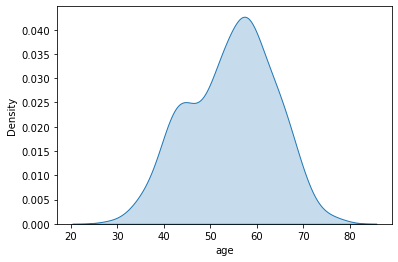

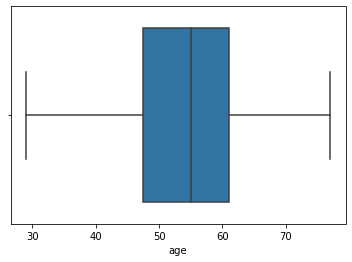

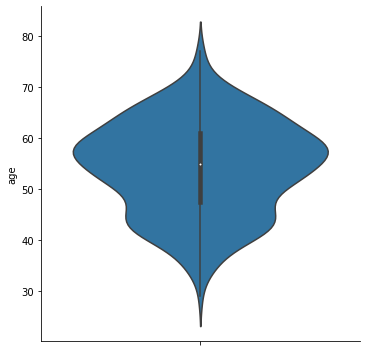

In [13]:
sns.kdeplot(df['age'],shade=True)   #visualizing density of age variable
plt.show()

sns.boxplot(x = "age",data = df);
plt.show()
sns.catplot(y = "age",kind="violin",  data = df);
plt.show()

### 'Sex' variable

In [14]:
df['sex'].unique()

[1, 0]
Categories (2, int64): [1, 0]

In [15]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

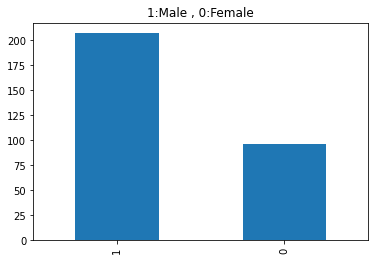

In [16]:
df['sex'].value_counts().plot.bar()
plt.title("1:Male , 0:Female")
plt.show()

### CP: Chest Pain Type Variable

In [17]:
df['cp'].unique()

[3, 2, 1, 0]
Categories (4, int64): [3, 2, 1, 0]

In [18]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

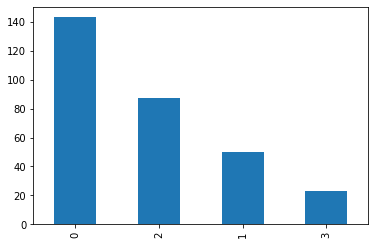

In [19]:
df['cp'].value_counts().plot.bar()
plt.show()

### Trestbps : Resting Blood Pressure Variable

In [20]:
df['trestbps'].nunique()

49

In [21]:
df['trestbps'].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

In [22]:
df['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

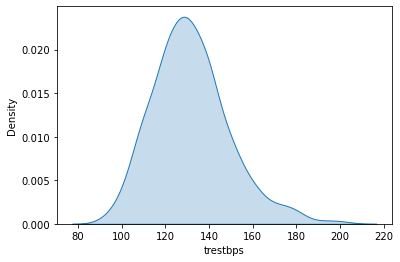

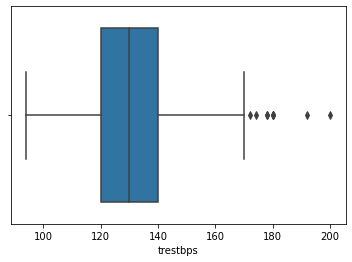

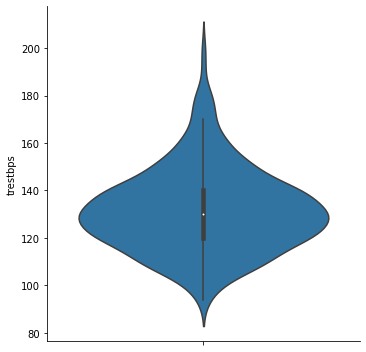

In [23]:
sns.kdeplot(df['trestbps'],shade=True)   #visualizing density of age variable
plt.show()

sns.boxplot(x = "trestbps",data = df);
plt.show()
sns.catplot(y = "trestbps",kind="violin",  data = df);
plt.show()

### Chol: Serum Cholesterol Variable

In [24]:
df['chol'].nunique()

152

In [25]:
df['chol'].unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131], dtype=int64)

In [26]:
df['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

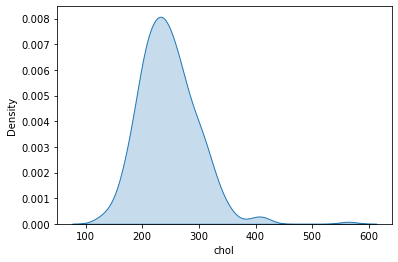

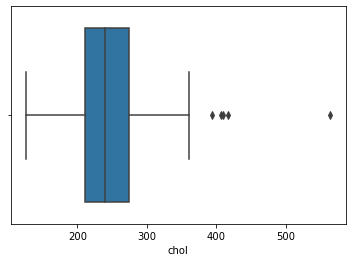

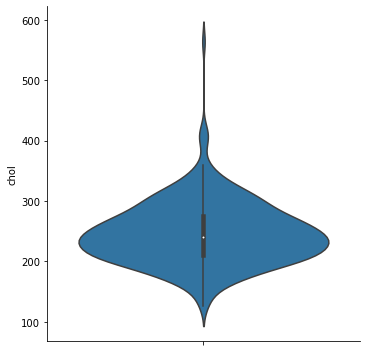

In [27]:
sns.kdeplot(df['chol'],shade=True)   
plt.show()

sns.boxplot(x = "chol",data = df);
plt.show()

sns.catplot(y = "chol",kind="violin",  data = df);
plt.show()

### fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) Variable

In [28]:
df['fbs'].unique()

[1, 0]
Categories (2, int64): [1, 0]

In [29]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

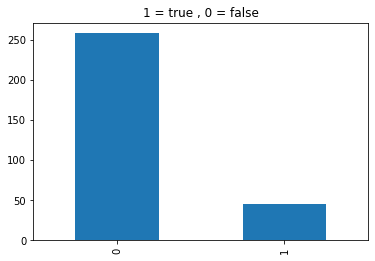

In [30]:
df['fbs'].value_counts().plot.bar()
plt.title("1 = true , 0 = false")
plt.show()

### Restecg : Resting Electrocardiographic Results

In [31]:
df["restecg"].dtype

CategoricalDtype(categories=[0, 1, 2], ordered=False)

In [32]:
df['restecg'].unique()

[0, 1, 2]
Categories (3, int64): [0, 1, 2]

In [33]:
df['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

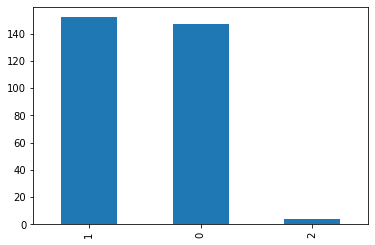

In [34]:
df['restecg'].value_counts().plot.bar()
plt.show()

### Thalach : Maximum Heart Rate Achieved

In [35]:
df['thalach'].nunique()

91

In [36]:
df['thalach'].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90],
      dtype=int64)

In [37]:
df['thalach'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

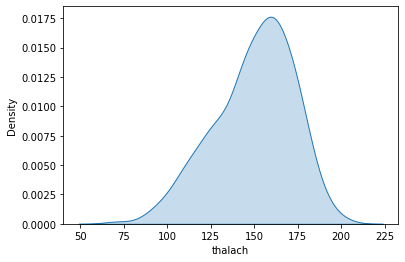

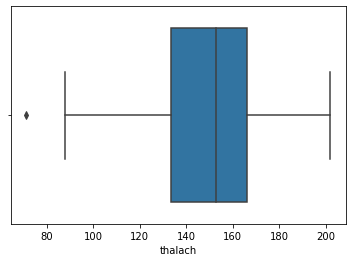

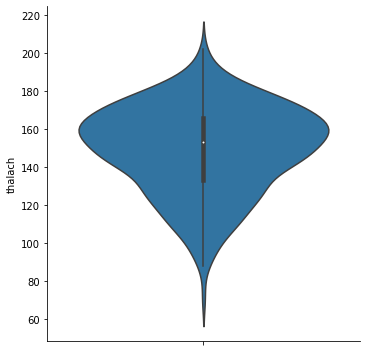

In [38]:
sns.kdeplot(df['thalach'],shade=True)   
plt.show()

sns.boxplot(x = "thalach",data = df);
plt.show()
sns.catplot(y = "thalach",kind="violin",  data = df);
plt.show()

### Exang : Exercise Induced Angina (1 = yes , 0 = no)

In [39]:
df['exang'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [40]:
df['exang'].value_counts()

0    204
1     99
Name: exang, dtype: int64

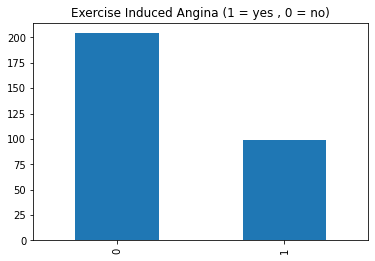

In [41]:
df['exang'].value_counts().plot.bar()
plt.title("Exercise Induced Angina (1 = yes , 0 = no)")
plt.show()

### Oldpeak : ST Depression Induced by Exercise Relative to Rest

In [42]:
df['oldpeak'].nunique()

40

In [43]:
df['oldpeak'].unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

In [44]:
df['oldpeak'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

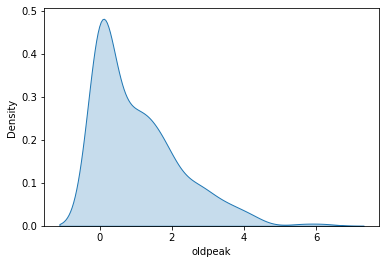

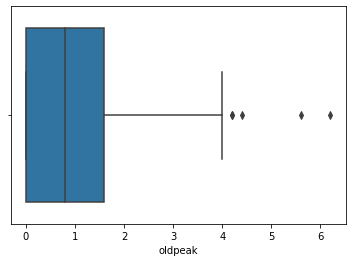

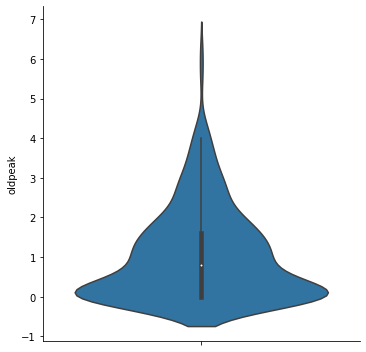

In [45]:
sns.kdeplot(df['oldpeak'],shade=True)   
plt.show()

sns.boxplot(x = "oldpeak",data = df);
plt.show()
sns.catplot(y = "oldpeak",kind="violin",  data = df);
plt.show()

### Slope : The Slope of the Peak Exercise ST Segment

In [46]:
df['slope'].nunique()

3

In [47]:
df['slope'].unique()

[0, 2, 1]
Categories (3, int64): [0, 2, 1]

In [48]:
df['slope'].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

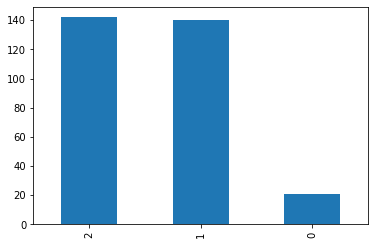

In [49]:
df['slope'].value_counts().plot.bar()
plt.show()

### CA : Number of Major Vessels (0-3) Colored by Flourosopy

In [50]:
df['ca'].dtype

CategoricalDtype(categories=[0, 1, 2, 3, 4], ordered=False)

In [51]:
df['ca'].unique()

[0, 2, 1, 3, 4]
Categories (5, int64): [0, 2, 1, 3, 4]

In [52]:
df['ca'].describe()

count     303
unique      5
top         0
freq      175
Name: ca, dtype: int64

In [53]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

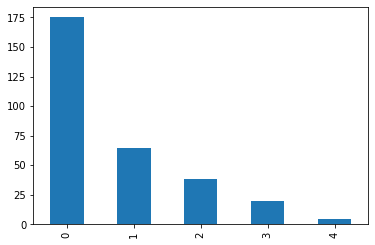

In [54]:
df['ca'].value_counts().plot.bar()
plt.show()

### 'Thal' Variable

In [55]:
df['thal'].unique()

[1, 2, 3, 0]
Categories (4, int64): [1, 2, 3, 0]

In [56]:
df['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

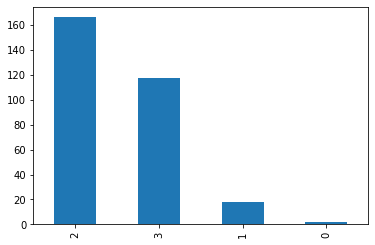

In [57]:
df['thal'].value_counts().plot.bar()
plt.show()

### 'Target' Variable

In [58]:
df["target"].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [59]:
df['target'].unique()

[1, 0]
Categories (2, int64): [1, 0]

In [60]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

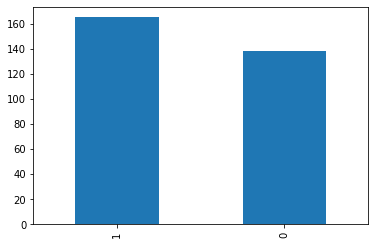

In [61]:
df['target'].value_counts().plot.bar()
plt.show()

In [8]:
df.select_dtypes(include=['int64','float64'])

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


In [9]:
df_num=df.select_dtypes(include=['int64','float64'])
df_cat=df.select_dtypes(include=['category'])
df_cat=df_cat.drop(columns=['target'])

In [10]:
df_cat.head()
#df_num["target"]=df["target"]

,sex,cp,fbs,restecg,exang,slope,ca,thal
0,1,3,1,0,0,0,0,1
1,1,2,0,1,0,0,0,2
2,0,1,0,0,0,2,0,2
3,1,1,0,1,0,2,0,2
4,0,0,0,1,1,2,0,2


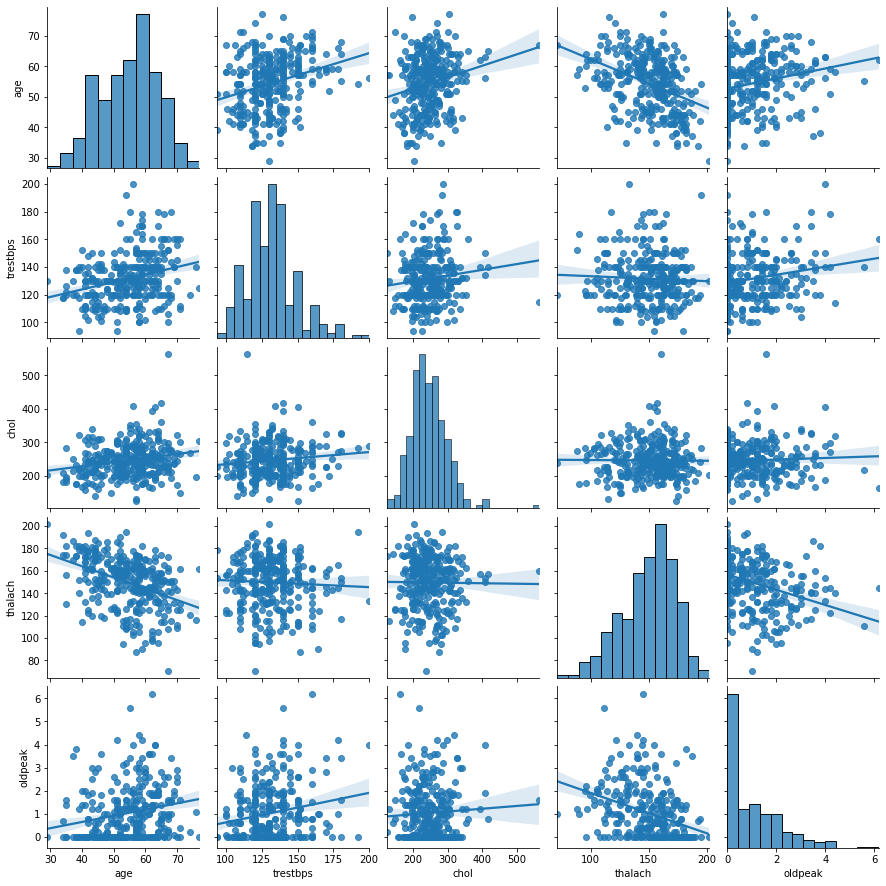

In [65]:
sns.pairplot(df_num, kind = "reg");

In [66]:
df_num.corr()

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trestbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


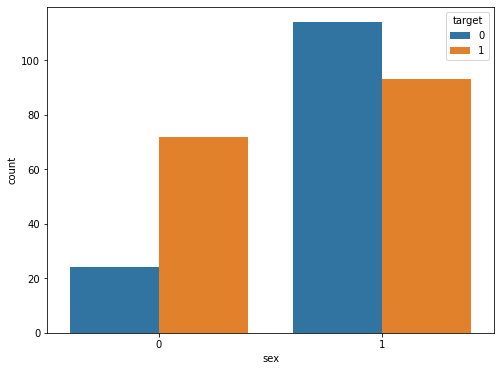

In [70]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="sex", hue="target",  data=df)
plt.show()

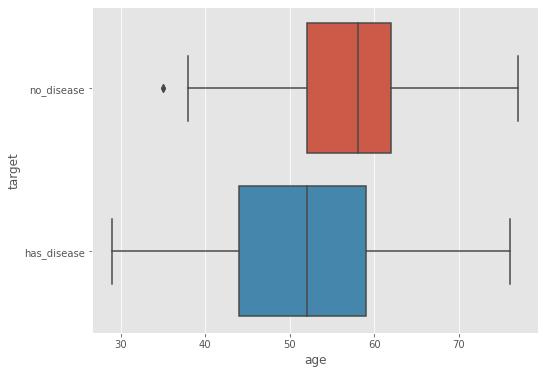

In [85]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(x="age", y="target",  data=df_vis)
plt.show()

In [ ]:
fig, axes = plt.subplots(figsize=(16, 12), sharex=True)

sns.pointplot(x="age",y="chol",hue="target",data=df)      

In [11]:
data=df.copy()

# VISUALIZATION

In [12]:
#Renaming columns.
df_vis=df.copy()
df_vis.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [76]:
df_vis.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [77]:
df_vis['sex'] = df_vis['sex'].map({0:'female',1:'male'})
df_vis['chest_pain_type'] = df_vis['chest_pain_type'].map({3:'asymptomatic', 1:'atypical_angina', 2:'non_anginal_pain', 0:'typical_angina'})
df_vis['fasting_blood_sugar'] = df_vis['fasting_blood_sugar'].map({0:'less_than_120mg/ml',1:'greater_than_120mg/ml'})
df_vis['rest_ecg'] = df_vis['rest_ecg'].map({0:'normal',1:'ST-T_wave_abnormality',2:'left_ventricular_hypertrophy'})
df_vis['exercise_induced_angina'] = df_vis['exercise_induced_angina'].map({0:'no',1:'yes'})
df_vis['st_slope'] = df_vis['st_slope'].map({0:'upsloping',1:'flat',2:'downsloping'})
df_vis['thalassemia'] = df_vis['thalassemia'].map({1:'fixed_defect',2:'normal',3:'reversable_defect'})
df_vis['target'] = df_vis['target'].map({0:'no_disease', 1:'has_disease'})
df_vis.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater_than_120mg/ml,normal,150,no,2.3,upsloping,0,fixed_defect,has_disease
1,37,male,non_anginal_pain,130,250,less_than_120mg/ml,ST-T_wave_abnormality,187,no,3.5,upsloping,0,normal,has_disease
2,41,female,atypical_angina,130,204,less_than_120mg/ml,normal,172,no,1.4,downsloping,0,normal,has_disease
3,56,male,atypical_angina,120,236,less_than_120mg/ml,ST-T_wave_abnormality,178,no,0.8,downsloping,0,normal,has_disease
4,57,female,typical_angina,120,354,less_than_120mg/ml,ST-T_wave_abnormality,163,yes,0.6,downsloping,0,normal,has_disease


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator

import math
import random
import os
import time

from numpy import interp
cust_palt = [
    '#c70039', '#f37121', '#ffbd69', '#ffc93c'
]

plt.style.use('ggplot')

In [87]:
def ctg_dist(df, cols, hue=None,rows=3, columns=3):
    
    '''A function for displaying cateorical distribution'''
    
    fig, axes = plt.subplots(rows, columns, figsize=(16, 12))
    axes = axes.flatten()

    for i, j in zip(df[cols].columns, axes):
        sns.countplot(x=i,
                    data=df,
                    palette=cust_palt,
                    hue=hue,
                    ax=j,
                    order=df[i].value_counts().index)
        j.tick_params(labelrotation=10)
        
        total = float(len(df[i]))
        
        j.set_title(f'{str(i).capitalize()} Distribution')
        
        
        for p in j.patches:
            height = p.get_height()
            j.text(p.get_x() + p.get_width() / 2.,
                    height + 2,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha='center')
        
        plt.tight_layout()

In [88]:
df_vis.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater_than_120mg/ml,normal,150,no,2.3,upsloping,0,fixed_defect,has_disease
1,37,male,non_anginal_pain,130,250,less_than_120mg/ml,ST-T_wave_abnormality,187,no,3.5,upsloping,0,normal,has_disease
2,41,female,atypical_angina,130,204,less_than_120mg/ml,normal,172,no,1.4,downsloping,0,normal,has_disease
3,56,male,atypical_angina,120,236,less_than_120mg/ml,ST-T_wave_abnormality,178,no,0.8,downsloping,0,normal,has_disease
4,57,female,typical_angina,120,354,less_than_120mg/ml,ST-T_wave_abnormality,163,yes,0.6,downsloping,0,normal,has_disease


In [89]:
categorical = [i for i in df_vis.loc[:,df_vis.nunique()<=10]]
continuous = [i for i in df_vis.loc[:,df_vis.nunique()>=10]]

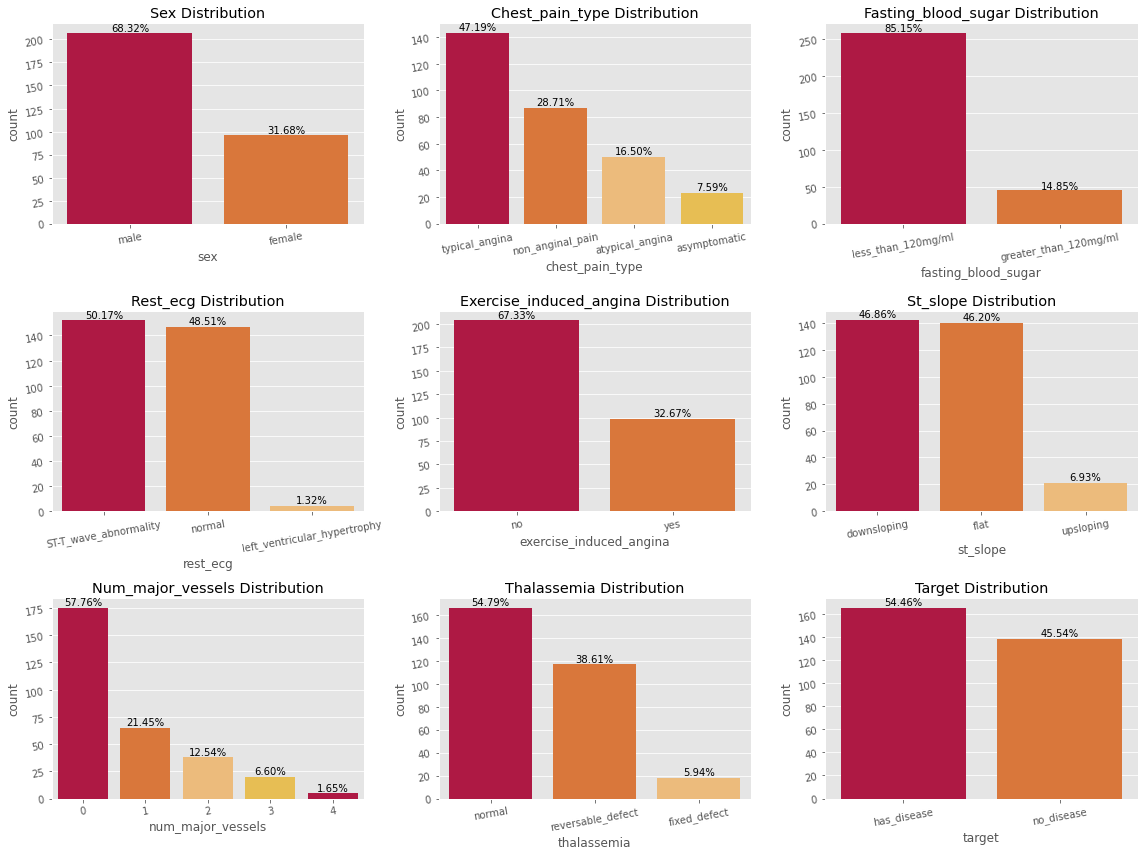

In [90]:
ctg_dist(df_vis, categorical)

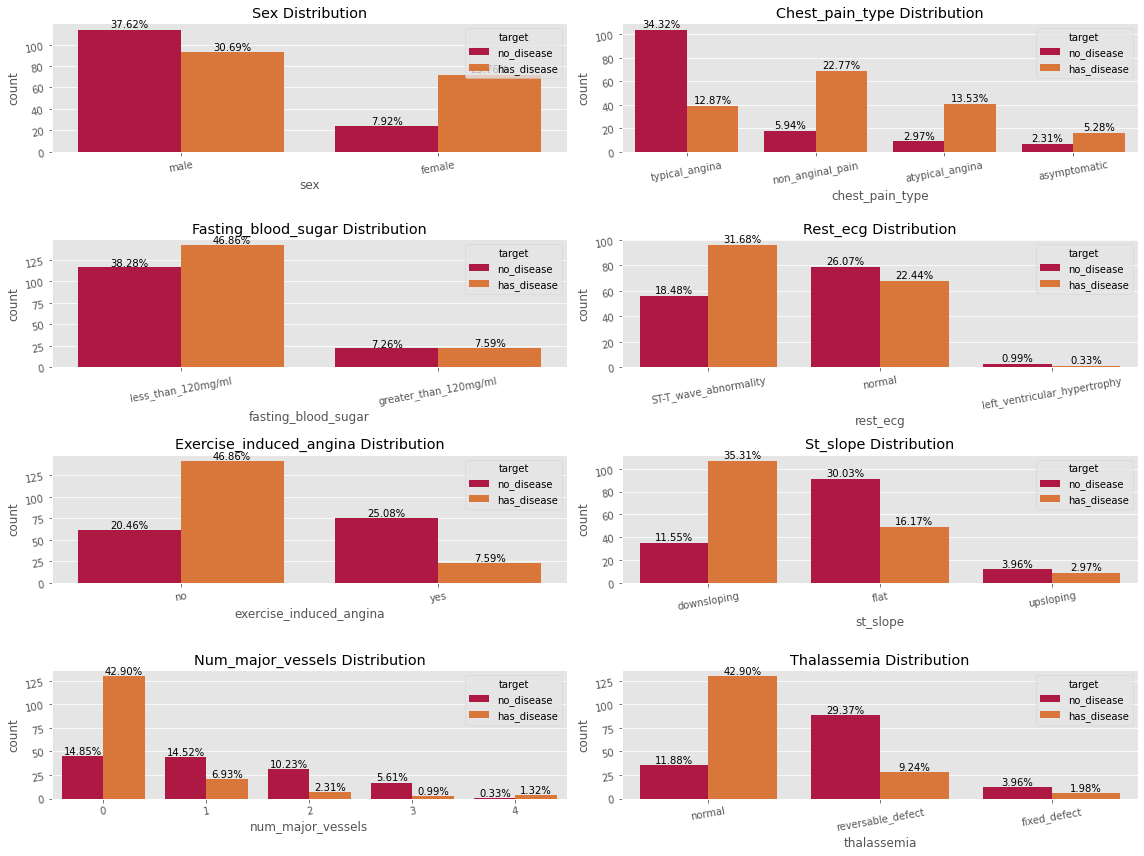

In [91]:
# Categorical data vs target:

ctg_dist(df_vis, categorical[:-1], 'target', 4, 2)

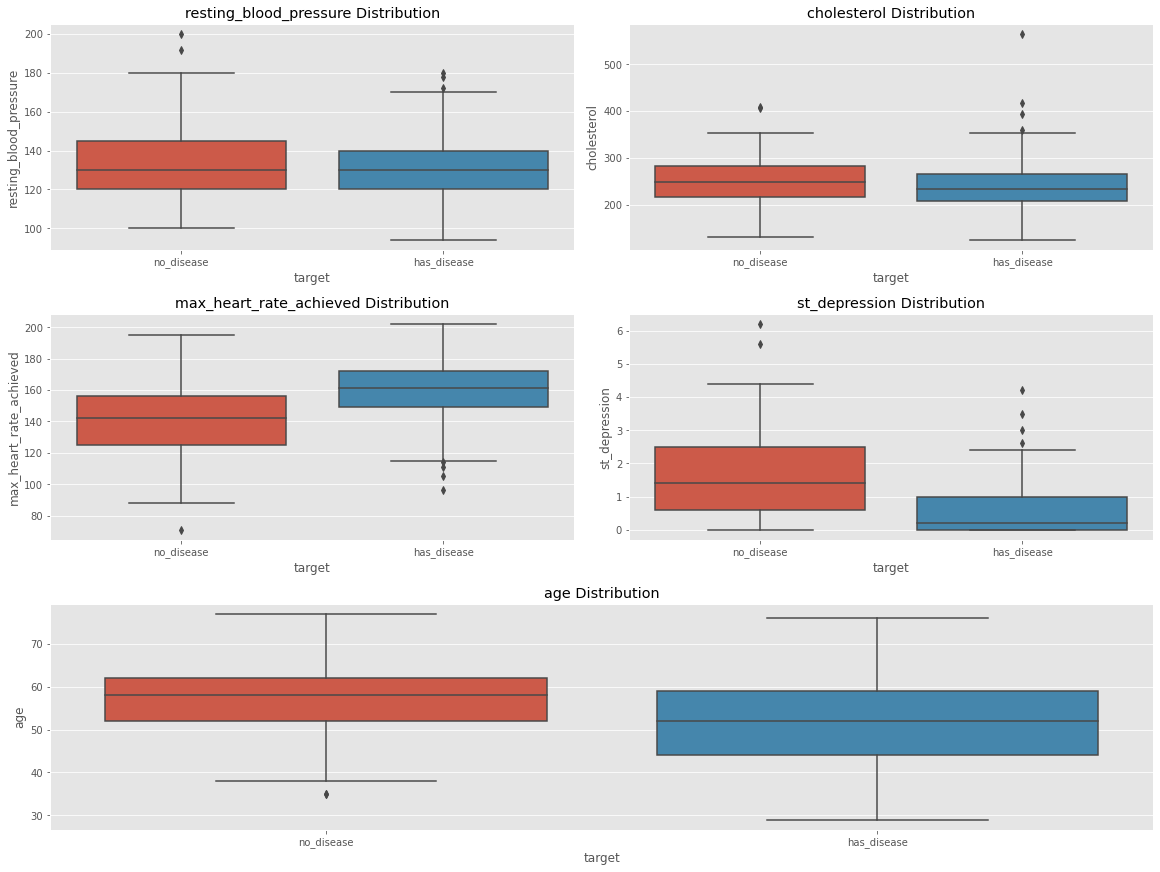

In [92]:
# Displaying numeric distribution vs target:

fig = plt.figure(constrained_layout=True, figsize=(16, 12))


grid = gridspec.GridSpec(ncols=4, nrows=3, figure=fig)

ax1 = fig.add_subplot(grid[0, :2])

ax1.set_title('resting_blood_pressure Distribution')

sns.boxplot(x='target',
                    y='resting_blood_pressure',
                    data=df_vis,
                    ax=ax1)


ax2 = fig.add_subplot(grid[0, 2:])

ax2.set_title('cholesterol Distribution')

sns.boxplot(x='target',
                    y='cholesterol',
                    data=df_vis,
                    ax=ax2)

ax3 = fig.add_subplot(grid[1, :2])

ax3.set_title('max_heart_rate_achieved Distribution')

sns.boxplot(x='target',
                    y='max_heart_rate_achieved',
                    data=df_vis,
                    ax=ax3)

ax4 = fig.add_subplot(grid[1, 2:])

ax4.set_title('st_depression Distribution')

sns.boxplot(x='target',
                    y='st_depression',
                    data=df_vis,
                    ax=ax4)


ax5 = fig.add_subplot(grid[2, :])

ax5.set_title('age Distribution')

sns.boxplot(x='target',
                    y='age',
                    data=df_vis,
                    ax=ax5)

plt.show()

(5.5, -0.5)

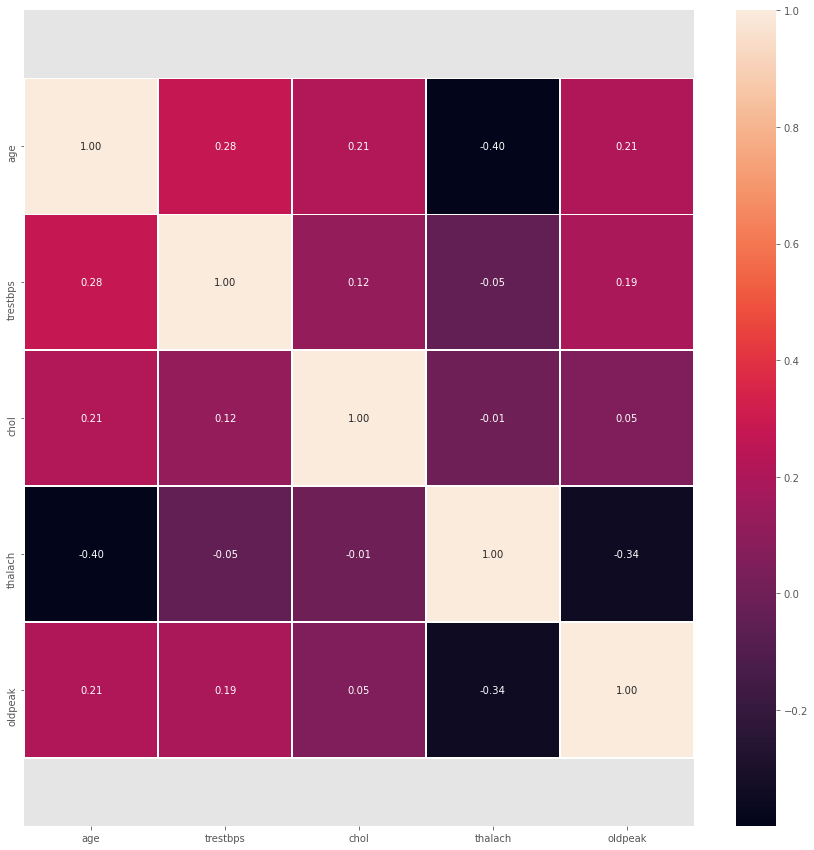

In [94]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<AxesSubplot:title={'center':'Correlation with target'}>

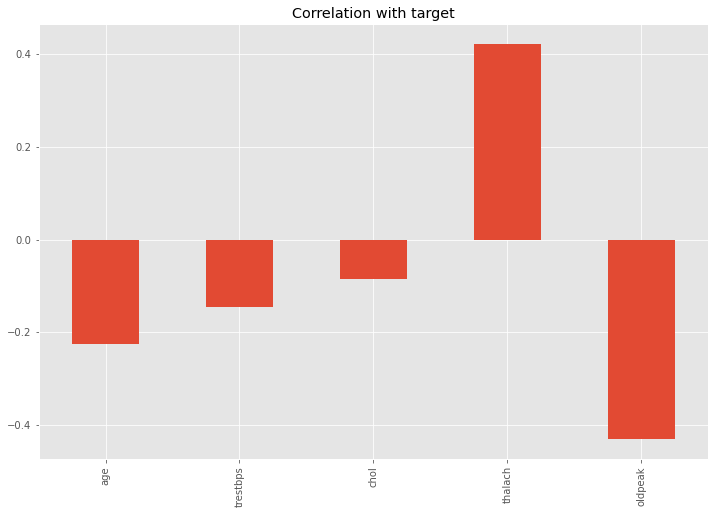

In [95]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

# Data Preprocessing

## Removing Outliers

In [13]:
dataset=df_num.copy()
dataset

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


In [14]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1

df3 = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]

print (df3)

     age  trestbps  chol  thalach  oldpeak
0     63       145   233      150      2.3
1     37       130   250      187      3.5
2     41       130   204      172      1.4
3     56       120   236      178      0.8
4     57       120   354      163      0.6
..   ...       ...   ...      ...      ...
298   57       140   241      123      0.2
299   45       110   264      132      1.2
300   68       144   193      141      3.4
301   57       130   131      115      1.2
302   57       130   236      174      0.0

[284 rows x 5 columns]


In [15]:
dataset=df.copy()
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [16]:
dataset["age"]=df3["age"]
dataset["trestbps"]=df3["trestbps"]
dataset["chol"]=df3["chol"]
dataset["thalach"]=df3["thalach"]
dataset["oldpeak"]=df3["oldpeak"]

In [17]:
dataset=dataset.dropna()

In [18]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37.0,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41.0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56.0,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57.0,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,0
299,45.0,1,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,0
300,68.0,1,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,0
301,57.0,1,0,130.0,131.0,0,1,115.0,1,1.2,1,1,3,0


## One Hot Transformation

In [19]:
dataset = pd.get_dummies(df, columns = df_cat.columns.tolist())
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [20]:
dataset.dtypes

age             int64
trestbps        int64
chol            int64
thalach         int64
oldpeak       float64
target       category
sex_0           uint8
sex_1           uint8
cp_0            uint8
cp_1            uint8
cp_2            uint8
cp_3            uint8
fbs_0           uint8
fbs_1           uint8
restecg_0       uint8
restecg_1       uint8
restecg_2       uint8
exang_0         uint8
exang_1         uint8
slope_0         uint8
slope_1         uint8
slope_2         uint8
ca_0            uint8
ca_1            uint8
ca_2            uint8
ca_3            uint8
ca_4            uint8
thal_0          uint8
thal_1          uint8
thal_2          uint8
thal_3          uint8
dtype: object

## Scaling the Data

In [22]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
numeric_col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[numeric_col] = sc.fit_transform(dataset[numeric_col])
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [23]:
dataset.to_csv("Processing_HeartDisease_data.csv",header=True,index=None)

## Logistic Regression

In [18]:
y = dataset["target"]
X = dataset.drop(["target"], axis=1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)


loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [20]:
accuracy_score(y_test, loj_model.predict(X_test))

0.8681318681318682

In [21]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.8455555555555554

In [349]:
a=cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

In [350]:
accuracy.append(a)
model_name.append("Logistic Regression")
accuracy

[0.8455555555555554]

In [345]:
model_name

['Logistic Regression']

In [24]:
loj_model.coef_

array([[ 0.19515161, -0.13639258, -0.0395351 ,  0.25238598, -0.49930355,
         0.45060611, -0.54592251, -1.06657781, -0.41190652,  0.6984028 ,
         0.68476513, -0.2417804 ,  0.146464  , -0.27866054,  0.36746932,
        -0.18412517,  0.44995688, -0.54527328, -0.22018112, -0.5813763 ,
         0.70624102,  1.648652  , -0.53764762, -1.03332186, -0.26152887,
         0.08852995,  0.03060428,  0.33265462,  0.54544965, -1.00402494]])

In [27]:
X_train.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_0', 'sex_1',
       'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [77]:
f_imp=pd.DataFrame({'Variables':X.columns, 'Coefficients':loj_model.coef_[0]})
f_imp

,Variables,Coefficients
0,age,0.195152
1,trestbps,-0.136393
2,chol,-0.039535
3,thalach,0.252386
4,oldpeak,-0.499304
5,sex_0,0.450606
6,sex_1,-0.545923
7,cp_0,-1.066578
8,cp_1,-0.411907
9,cp_2,0.698403


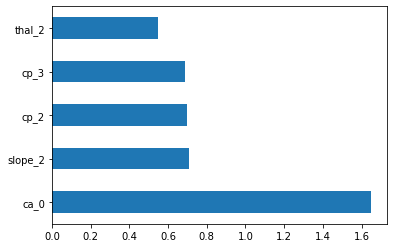

In [85]:
feat_importances = pd.Series(loj_model.coef_[0], index=X.columns)
feat_importances.nlargest().plot(kind='barh')
plt.show()

In [69]:
dff=pd.concat([X,y], axis=1)

In [29]:
# define dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

# define models and parameters
log_model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=log_model, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

Best: 0.834632 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.834632 with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.834632 with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.834632 with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.834632 with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.834632 with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.834632 with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.829654 with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.829654 with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.829654 with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.820346 with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.820346 with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.820346 with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.791775 with: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.791775 with: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.791775 with: {'C': 0.01

In [30]:
print("Best Parameters: " + str(grid_search.best_params_))

Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [31]:
log_tuning =LogisticRegression(solver="newton-cg",penalty = "l2", C = 100 ).fit(X_train, y_train)

In [32]:
y_pred_log = log_tuning.predict(X_test)
accuracy_score(y_test, y_pred_log)

0.8461538461538461

In [30]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        41
           1       0.86      0.86      0.86        50

    accuracy                           0.85        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



In [31]:
sklearn.metrics.confusion_matrix(y_test, y_pred_log, labels=None, sample_weight=None, normalize=None)

array([[34,  7],
       [ 7, 43]], dtype=int64)

In [7]:
a=0.8461538461538461
accuracy.append(a)
model_name.append("Logistic Regression")

## Gaussian Naive Bayes

In [28]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [29]:
y_pred = nb_model.predict(X_test)

In [30]:
accuracy_score(y_test, y_pred)

0.6813186813186813

In [31]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.7566666666666666

In [8]:
a=0.7566666666666666
accuracy.append(a)
model_name.append("Gaussian Naive Bayes")

In [351]:
a=cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

In [352]:
accuracy.append(a)
model_name.append("Gaussian Naive Bayes")
accuracy

[0.8455555555555554, 0.7566666666666666]

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.90      0.72        41
           1       0.86      0.50      0.63        50

    accuracy                           0.68        91
   macro avg       0.73      0.70      0.68        91
weighted avg       0.74      0.68      0.67        91



In [40]:
sklearn.metrics.confusion_matrix(y_test, 
                                 y_pred, 
                                 labels=None, 
                                 sample_weight=None, 
                                 normalize=None)

array([[37,  4],
       [25, 25]], dtype=int64)

# KNN

In [33]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [34]:
y_pred = knn_model.predict(X_test)

In [35]:
accuracy_score(y_test, y_pred)

0.8681318681318682

In [123]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       0.88      0.88      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



## Model Tuning

In [48]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [49]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [50]:
print("Best parameters: " + str(knn_cv.best_params_))

Best parameters: {'n_neighbors': 6}


In [51]:
knn = KNeighborsClassifier(6)
knn_tuned = knn.fit(X_train, y_train)

In [52]:
knn_tuned.score(X_test, y_test)

0.8241758241758241

In [53]:
y_pred = knn_tuned.predict(X_test)

In [54]:
accuracy_score(y_test, y_pred)

0.8241758241758241

In [4]:
a=0.8241758241758241
accuracy.append(a)
model_name.append("KNN")

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81        41
           1       0.87      0.80      0.83        50

    accuracy                           0.82        91
   macro avg       0.82      0.83      0.82        91
weighted avg       0.83      0.82      0.82        91



In [57]:
sklearn.metrics.confusion_matrix(y_test, y_pred, labels=None, sample_weight=None, normalize=None)

array([[35,  6],
       [10, 40]], dtype=int64)

# Artificial neural networks

In [141]:
from sklearn.preprocessing import StandardScaler  

In [192]:
sc = StandardScaler()

In [193]:
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [195]:
mlp = MLPClassifier()
mlp_model = mlp.fit(X_train_sc, y_train)
mlp_model

MLPClassifier()

In [196]:
y_predict = mlp_model.predict(X_test_sc)
accuracy_score(y_test, y_predict)

0.8461538461538461

In [194]:
from sklearn.neural_network import MLPClassifier

## Model Tuning

In [148]:
mlp_model

MLPClassifier()

In [198]:
params_mlp = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}


In [206]:
mlp_cv_ = GridSearchCV(mlp_model, params_mlp, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

mlp_cv_.fit(X_train_sc, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   59.5s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  3.9min finished


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [207]:
print("Best parameters: " + str(mlp_cv_.best_params_))

Best parameters: {'activation': 'relu', 'alpha': 0.005, 'hidden_layer_sizes': (100, 100), 'solver': 'sgd'}


In [226]:
mlp_tuning = MLPClassifier(activation = "relu", 
                           alpha = 0.005,
                           hidden_layer_sizes = (100, 100),
                          solver = "sgd")

In [227]:
mlp_tuning.fit(X_train_sc, y_train)

MLPClassifier(alpha=0.005, hidden_layer_sizes=(100, 100), solver='sgd')

In [228]:
y_prediction = mlp_tuning.predict(X_test_sc)
accuracy_score(y_test, y_prediction)

0.8681318681318682

In [2]:
accuracy=[]
model_name=[]
a=0.8681318681318682
accuracy.append(a)
model_name.append("Artificial Neural Networks")

In [204]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        41
           1       0.82      0.92      0.87        50

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.84        91



In [205]:
sklearn.metrics.confusion_matrix(y_test, 
                                 y_prediction, 
                                 labels=None, 
                                 sample_weight=None,
                                 normalize=None)

array([[31, 10],
       [ 4, 46]], dtype=int64)

In [371]:
a=0.8791208791208791
accuracy.append(a)
model_name.append("MLP")

# Comparison of Algorithms

In [16]:
accuracy=[]
model_name=[]
score_mlp=0.8681318681318682
accuracy.append(score_mlp)
model_name.append("Artificial Neural Networks")

In [17]:
score_knn=0.8241758241758241
accuracy.append(score_knn)
model_name.append("KNN")

In [18]:
score_log=0.8461538461538461
accuracy.append(score_log)
model_name.append("Logistic Regression")

In [19]:
score_nb=0.7566666666666666
accuracy.append(score_nb)
model_name.append("Gaussian Naive Bayes")

In [20]:
d = {'Models': model_name, 'Accuracy':accuracy}
df_models=pd.DataFrame(data=d)
df_models

,Models,Accuracy
0,Artificial Neural Networks,0.868132
1,KNN,0.824176
2,Logistic Regression,0.846154
3,Gaussian Naive Bayes,0.756667


In [21]:
df_models["Accuracy"]=df_models["Accuracy"]*100

In [22]:
df_models= df_models.rename(columns={'Accuracy': 'Accuracy(%)'})

In [23]:
df_models.sort_values('Accuracy(%)',ascending=False)

,Models,Accuracy(%)
0,Artificial Neural Networks,86.813187
2,Logistic Regression,84.615385
1,KNN,82.417582
3,Gaussian Naive Bayes,75.666667
